In [1]:
# Importing the required modules

In [2]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
import warnings
import pickle
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [4]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [5]:
# Obtaining data specific to Anantapur

In [6]:
df = df[df['District'] == 'Chittoor']
df.head()

,Unnamed: 0,Latitude,Longitude,District,Mandal,Village,SoilType,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,NDVI,ARVI,EVI,GCI,NDWI,Crop
140,140,12.91,78.35,Chittoor,Santipuram,121.Pedduru,Red,7.25,0.23,0.27,47.2,123.0,718.0,222.0,15.08,1.94,0.53,6.61,0.69,19.54,0.428653,0.197590,0.770615,1.963227,-0.495361,Tomato
141,141,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Black,7.46,1.99,0.56,53.6,134.0,1673.0,410.0,233.99,1.09,0.79,40.66,1.95,6.06,0.346192,0.108864,0.547303,1.752275,-0.466990,Tomato
142,142,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Red,7.20,0.69,0.76,49.6,244.0,1303.0,167.0,32.83,0.05,0.86,0.08,0.10,0.05,0.346192,0.108864,0.547303,1.752275,-0.466990,Sweetcorn
143,143,12.90,78.35,Chittoor,Santipuram,121.Pedduru,Black,7.88,0.80,0.62,9.8,197.0,1160.0,300.0,59.88,4.64,0.67,9.39,1.70,22.50,0.346192,0.108864,0.547303,1.752275,-0.466990,Tomato
144,144,12.91,78.36,Chittoor,Santipuram,121.Pedduru,Black,7.26,0.18,0.48,4.0,45.0,746.0,185.0,7.36,1.73,0.54,7.61,0.69,19.59,0.266082,0.014559,0.347218,1.915825,-0.489252,Mulberry


In [7]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'NDVI', 'NDWI'], axis = 1)
df.describe()

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,7.338174,0.257898,0.505308,29.294692,102.707006,1481.796178,321.492569,24.615202,1.868684,0.528301,12.601104,1.342696,11.245584,2.412198
std,0.759805,0.293259,0.259784,28.052609,96.874118,718.946118,147.340709,52.275636,1.866678,0.282684,10.908322,0.617106,6.527836,0.970492
min,5.000000,0.020000,0.090000,0.800000,15.000000,56.000000,11.000000,1.340000,0.050000,0.090000,0.070000,0.100000,0.050000,0.694297
25%,6.950000,0.090000,0.330000,7.300000,52.000000,959.500000,220.000000,4.855000,0.760000,0.325000,6.075000,0.910000,6.580000,1.728166
50%,7.520000,0.160000,0.470000,22.200000,75.000000,1361.000000,304.000000,9.510000,1.370000,0.480000,9.300000,1.230000,10.150000,2.169689
75%,7.900000,0.305000,0.620000,41.200000,122.000000,1898.500000,414.000000,23.050000,2.235000,0.690000,15.320000,1.685000,14.770000,2.933333
max,9.150000,3.030000,1.470000,224.600000,1307.000000,4451.000000,1020.000000,698.150000,13.650000,2.440000,76.770000,4.060000,48.500000,4.920277


In [8]:
# Analysis of SoilType

In [9]:
df.SoilType.unique()

array(['Red', 'Black', 'red', 'Rock soil', '-', 'Sandy Red', 'Red Sandy',
       'Sandy', 'Black Sandy', 'Claim', 'Rox Soil'], dtype=object)

In [10]:
df = df[(df["SoilType"] != '-') & (df["SoilType"] != 'Claim')]
df['SoilType'] = df['SoilType'].replace(['Red', 'red'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Black', 'Black Sandy'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace('Sandy', 'Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy Red', 'Red Sandy'], 'Red Sandy Soil')
df['SoilType'] = df['SoilType'].replace(['Rock soil', 'Rox Soil'], 'Rock Soil')
df.SoilType.unique()

array(['Red Soil', 'Black Soil', 'Rock Soil', 'Red Sandy Soil',
       'Sandy Soil'], dtype=object)

In [11]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Black Soil': 139,
 'Red Sandy Soil': 5,
 'Red Soil': 297,
 'Rock Soil': 20,
 'Sandy Soil': 7}

<BarContainer object of 5 artists>

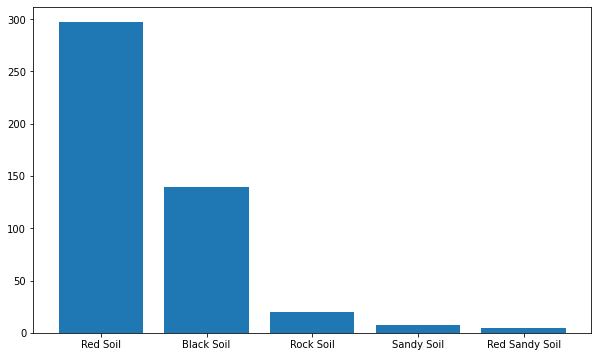

In [12]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [13]:
# Analysis of Crops grown 

In [14]:
df.Crop.unique()

array(['Tomato', 'Sweetcorn', 'Mulberry', 'Potatao', 'Cabage',
       'Groundnut', 'Potato', 'Paddy', 'Banana', 'Mulbarry', 'Chillies',
       'Jowar', 'Maize', 'Mango', 'Flowers', 'Beans', 'Vegetables',
       'Horse gram', 'Papaya', 'Cabbage', 'Dhavanam', 'Horsegram',
       'banana', 'beans', 'Cucumber', 'Benda', 'Donda', 'Anaar',
       'Fodder Crops', 'Beera', 'Ragi'], dtype=object)

In [15]:
df['Crop'].value_counts()

Groundnut       271
Tomato           54
Potato           36
Beans            26
Sweetcorn         9
Flowers           9
Mango             8
Mulbarry          7
Mulberry          7
Horse gram        4
Chillies          4
Jowar             3
Paddy             3
Maize             2
Cabbage           2
Cucumber          2
Horsegram         2
Cabage            2
Donda             2
beans             2
Banana            2
Potatao           2
banana            1
Vegetables        1
Dhavanam          1
Papaya            1
Ragi              1
Fodder Crops      1
Anaar             1
Benda             1
Beera             1
Name: Crop, dtype: int64

GroundNut    271
Tomato        54
Potato        38
Beans         28
Mulberry      14
SweetCorn      9
Mango          8
HorseGram      6
Name: Crop, dtype: int64


<BarContainer object of 8 artists>

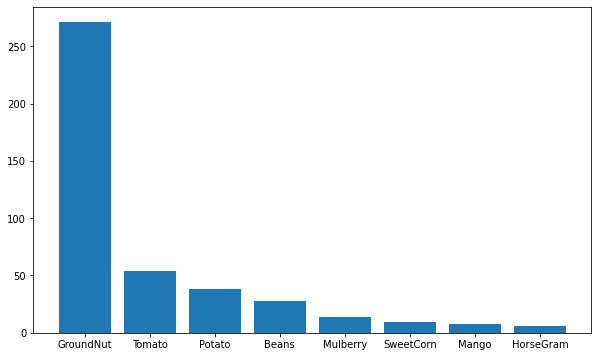

In [16]:
df['Crop'] = df['Crop'].replace('Groundnut', 'GroundNut')
df['Crop'] = df['Crop'].replace('Tomato', 'Tomato')
df['Crop'] = df['Crop'].replace('Sweetcorn', 'SweetCorn')
df['Crop'] = df['Crop'].replace(['Mulberry', 'Mulbarry'], 'Mulberry')
df['Crop'] = df['Crop'].replace(['Horsegram', 'Horse gram'], 'HorseGram')
df['Crop'] = df['Crop'].replace(['beans', 'Beans'], 'Beans')
df['Crop'] = df['Crop'].replace(['Cabbage', 'Cabage'], 'Cabbage')
df['Crop'] = df['Crop'].replace('Potatao', 'Potato')

df = df[(df['Crop'] != 'Ragi') & (df['Crop'] != 'banana') & (df['Crop'] != 'Fodder Crops')]
df = df[(df['Crop'] != 'Anaar') & (df['Crop'] != 'Dhavanam') & (df['Crop'] != 'Papaya')]
df = df[(df['Crop'] != 'Vegetables') & (df['Crop'] != 'Beera') & (df['Crop'] != 'Benda')]
df = df[(df['Crop'] != 'Flowers') & (df['Crop'] != 'Donda') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize')]
df = df[(df['Crop'] != 'Cucumber') & (df['Crop'] != 'Cabbage') & (df['Crop'] != 'Chillies') & (df['Crop'] != '-')]
df = df[(df['Crop'] != 'Jowar') & (df['Crop'] != 'Paddy') & (df['Crop'] != 'Cabbage')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [17]:
df = df[(df["Crop"] != 'SweetCorn') & (df["Crop"] != 'Mango') & (df["Crop"] != 'HorseGram')]

In [18]:
# Getting rid of features that have a high correlation among one another

In [19]:
cor_matrix = df.corr()
cor_matrix

,pH,EC,OC,P,K,Ca,Mg,S,Zn,B,Fe,Cu,Mn,GCI
pH,1.000000,0.196959,0.167321,0.257474,0.140853,0.585366,0.417403,0.065797,0.100992,0.338143,-0.281180,0.085569,-0.481612,0.086087
EC,0.196959,1.000000,0.271981,0.508463,0.390298,0.217636,0.319625,0.804249,0.232168,0.487348,-0.024144,0.079764,-0.069538,-0.013008
OC,0.167321,0.271981,1.000000,0.366306,0.303209,0.259071,0.324211,0.201927,0.374745,0.522572,0.124738,0.396300,0.081811,0.010200
P,0.257474,0.508463,0.366306,1.000000,0.442074,0.098802,0.331307,0.302228,0.406321,0.607754,-0.012178,0.214298,-0.036577,0.045042
K,0.140853,0.390298,0.303209,0.442074,1.000000,0.139512,0.203654,0.225678,0.221848,0.506844,-0.052497,0.137478,0.109595,0.005948
Ca,0.585366,0.217636,0.259071,0.098802,0.139512,1.000000,0.726085,0.107572,-0.016208,0.362603,-0.082309,0.224325,-0.246225,0.108446
Mg,0.417403,0.319625,0.324211,0.331307,0.203654,0.726085,1.000000,0.186015,0.106476,0.508170,0.043548,0.403892,-0.085886,0.050486
S,0.065797,0.804249,0.201927,0.302228,0.225678,0.107572,0.186015,1.000000,0.147281,0.299676,0.006282,0.075348,-0.000966,-0.017906
Zn,0.100992,0.232168,0.374745,0.406321,0.221848,-0.016208,0.106476,0.147281,1.000000,0.377776,0.002971,0.315376,0.145219,-0.136309
B,0.338143,0.487348,0.522572,0.607754,0.506844,0.362603,0.508170,0.299676,0.377776,1.000000,-0.000181,0.338284,0.016717,0.049095


In [20]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)

Columns to be dropped :  ['P', 'Ca', 'Mg', 'S', 'B', 'Cu']


In [21]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'K', 'Zn', 'Fe', 'Mn', 'GCI', 'Crop']


In [22]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [23]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

       pH    EC    OC      K  ...  Red Sandy Soil  Red Soil  Rock Soil  Sandy Soil
140  7.25  0.23  0.27  123.0  ...               0         1          0           0

[1 rows x 13 columns]
140    Tomato
Name: Crop, dtype: object


In [24]:
# Standardizing the independent variables using Feature Scaling
sc = StandardScaler()
X[:, 0:8] = sc.fit_transform(X[:, 0:8])

In [25]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# SMOTE: Synthetic Minority Over-sampling Technique

In [26]:
# Separating the dependent and independent variables
df = df.drop(['SoilType'], axis=1)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
smote = SMOTE()
X, y = smote.fit_resample(X, y)

In [27]:
# Standardizing the independent variables using Feature Scaling
sc2 = StandardScaler()
X[:, :] = sc2.fit_transform(X[:, :])

In [28]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [29]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [30]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [31]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7699115044247787


In [32]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 77.46 %
Standard Deviation: 2.43 %


# Decision Tree Classifier

In [33]:
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [35]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7227138643067846


In [36]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.83 %
Standard Deviation: 3.58 %


# Random Forest Classifier

In [37]:
clf3 = RandomForestClassifier(random_state=0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8436578171091446


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 85.53 %
Standard Deviation: 2.31 %


# XGBoost

In [41]:
clf4_4 =  HistGradientBoostingClassifier(random_state=0)
clf4_4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [42]:
y_test_pred = clf4_4.predict(X_test)
y_train_pred = clf4_4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [43]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.8200589970501475


In [44]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4_4, X = X_train, y = y_train, cv = 10)

In [45]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 84.94 %
Standard Deviation: 2.59 %


In [46]:
# pickle.dump(clf4_4, open('Chittoor_model.pkl', 'wb'))
# pickle.dump(sc2, open('Chittoor_scaler.pkl', 'wb'))
# HERE

# Multi-layer Perceptron Classifier

In [47]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [48]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [49]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.7372047244094488
Testing Accuracy:  0.6460176991150443


In [50]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 67.91 %
Standard Deviation: 3.14 %


# Catboost

In [51]:
from catboost import CatBoostClassifier, Pool, cv



model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.5431462	total: 48ms	remaining: 4.75s
1:	learn: 1.4607130	total: 50ms	remaining: 2.45s
2:	learn: 1.3876379	total: 51.4ms	remaining: 1.66s
3:	learn: 1.3378749	total: 52.8ms	remaining: 1.27s
4:	learn: 1.2803635	total: 54.4ms	remaining: 1.03s
5:	learn: 1.2419775	total: 55.8ms	remaining: 874ms
6:	learn: 1.2044728	total: 57.2ms	remaining: 760ms
7:	learn: 1.1763679	total: 58.7ms	remaining: 674ms
8:	learn: 1.1333816	total: 60.1ms	remaining: 607ms
9:	learn: 1.0970691	total: 61.7ms	remaining: 555ms
10:	learn: 1.0619263	total: 63.1ms	remaining: 510ms
11:	learn: 1.0348494	total: 64.6ms	remaining: 474ms
12:	learn: 1.0216005	total: 66ms	remaining: 442ms
13:	learn: 0.9749175	total: 67.6ms	remaining: 415ms
14:	learn: 0.9587930	total: 69.3ms	remaining: 392ms
15:	learn: 0.9379256	total: 70.9ms	remaining: 372ms
16:	learn: 0.9189595	total: 72.4ms	remaining: 353ms
17:	learn: 0.9095361	total: 73.8ms	remaining: 336ms
18:	learn: 0.8918335	total: 75.2ms	remaining: 321ms
19:	learn: 0.8697229	total: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 1.380599761
bestIteration = 99

Training on fold [1/5]

bestTest = 1.398037066
bestIteration = 99

Training on fold [2/5]

bestTest = 1.345532455
bestIteration = 99

Training on fold [3/5]

bestTest = 1.385774705
bestIteration = 99

Training on fold [4/5]

bestTest = 1.37250582
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
2:	learn: 1.4817590	total: 32.3ms	remaining: 10.7s
3:	learn: 1.4461921	total: 40.7ms	remaining: 10.1s
4:	learn: 1.4195502	total: 48.8ms	remaining: 9.71s
5:	learn: 1.3896552	total: 56.8ms	remaining: 9.41s
6:	learn: 1.3540902	total: 65.3ms	remaining: 9.27s
7:	learn: 1.3212271	total: 73.1ms	remaining: 9.07s
8:	learn: 1.2947063	total: 81.2ms	remaining: 8.94s
9:	learn: 1.2721757	total: 93.5ms	remaining: 9.25s
10:	learn: 1.2458312	total: 102ms	remaining: 9.14s
11:	learn: 1.2242519	total: 109ms	remaining: 8.99s
12:	learn: 1.2035830	total: 117ms	remaining: 8.86s
13:	learn: 1.1838719	total: 124ms	remaining: 8.76s
14:	learn: 1.1633670	total: 132ms	remaining: 8.69s
15:	learn: 1.1448589	total: 140ms	remaining: 8.6s
16:	learn: 1.1285978	total: 147ms	remaining: 8.5s
17:	learn: 1.1117847	total: 155ms	remaining: 8.46s
18:	learn: 1.0925508	total: 163ms	remaining: 8.39s
19:	learn: 1.0726051	total: 170ms	remaining: 8.34s
20:	learn: 1.0554600	total: 177ms